## Pytorch tutorial

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

### 1. Quickstart

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

### 2. Working with data

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad() # reinitialisation (optional)
        loss.backward()       # magic part 1/2
        optimizer.step()      # magic part 2/2

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")
# check if by default dataloader suffles the data between epochs

Epoch 1
-------------------------------
loss: 2.238085  [    0/60000]
loss: 2.241226  [ 6400/60000]
loss: 2.204574  [12800/60000]
loss: 2.205032  [19200/60000]
loss: 2.180001  [25600/60000]
loss: 2.135429  [32000/60000]
loss: 2.149553  [38400/60000]
loss: 2.100229  [44800/60000]
loss: 2.104124  [51200/60000]
loss: 2.048573  [57600/60000]
Test Error: 
 Accuracy: 56.0%, Avg loss: 2.048455 

Epoch 2
-------------------------------
loss: 2.062866  [    0/60000]
loss: 2.052495  [ 6400/60000]
loss: 1.966940  [12800/60000]
loss: 1.988936  [19200/60000]
loss: 1.893579  [25600/60000]
loss: 1.837220  [32000/60000]
loss: 1.857846  [38400/60000]
loss: 1.767597  [44800/60000]
loss: 1.782311  [51200/60000]
loss: 1.678340  [57600/60000]
Test Error: 
 Accuracy: 58.4%, Avg loss: 1.691524 

Epoch 3
-------------------------------
loss: 1.739444  [    0/60000]
loss: 1.708697  [ 6400/60000]
loss: 1.574503  [12800/60000]
loss: 1.623828  [19200/60000]
loss: 1.491911  [25600/60000]
loss: 1.470329  [32000/600

In [ ]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("data/model.pth"))


<All keys matched successfully>

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


## 2. Tensors

### 2.1 Initializing a Tensor

In [ ]:
import torch
import numpy as np

# from scratch
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

# from numpy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# from existing tensors
x_ones = torch.ones_like(x_data) # retains the properties of x_data
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Ones Tensor: \n {x_ones} \n")
print(f"Random Tensor: \n {x_rand} \n")

# from a dimensions
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4718, 0.0964],
        [0.4826, 0.1432]]) 

Random Tensor: 
 tensor([[0.4588, 0.3390, 0.3888],
        [0.4990, 0.6156, 0.9145]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 2.2 Attributes of a Tensor

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 2.3 Tensor operations

In [ ]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

In [ ]:
# similar to Numpy
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
torch.cat([tensor, tensor, tensor], dim=1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

# This computes the element-wise product. z1, z2 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

In [ ]:
tensor.sum().item() # extract a specific number with item() method

12.0

In [ ]:
tensor.add_(5) # in place methods are marked with _
print(tensor)

# In-place operations save some memory, but can be problematic
# when computing derivatives because of an immediate loss of history.
# Hence, their use is discouraged.

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### 2.4 Bridge with NumPy

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
# A change in the tensor reflects in the NumPy array...
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

# ... and vice versa
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]
t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## 3. Datasets and dataloaders

### 3.1 Loading a dataset




In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",   # where to store the data
    train=True,    # category train / test
    download=True, # force download if not available in root
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### 3.2 Iterating and Visualizing the Dataset

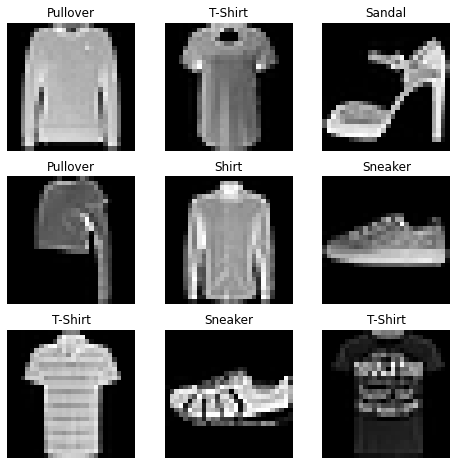

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 3.3 Creating a Custom Dataset for your files

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):

    # gets run once when instantiating the Dataset object
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file) # initialize image comments
        self.img_dir = img_dir # initialize the directory containing the images
        self.transform = transform
        self.target_transform = target_transform
    
    # returns the number of samples in our dataset
    def __len__(self):
        return len(self.img_labels)

    # returns a sample from the dataset at the given index
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### 3.4 Preparing your data for training with DataLoaders

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# batch_size: how many samples do you want to treat at once ?
# shuffle: at the end of each epoch (when you have read all your data once),
#   do you want to shuffle the data before the next epoch (and thus running)
#   the same code but with different batches

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


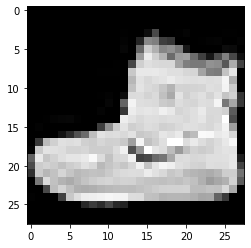

Label: 9


In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## 4. Transforms

### 4.1 Transforms

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(), # transforms the raw data (X) to a usable shape
                          # (here converts the image to a tensor)
    target_transform = Lambda(
        lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)
    ) # transforms the raw data (Y) to usable shape (here from labels to integers)
)

## 5. Build a neural network

### 5.1 Initialize

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    # Do not call model.forward() directly!
    def forward(self, x):
        x = self.flatten(x) # no information about the image structure is keeped
                            # (no notion of neighboring pixels) ; since the images
                            # are 28x28 pixels, the first layer of the network
                            # has 28*28 entries.
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### 5.2 Use model

In [ ]:
X = torch.rand(1, 28, 28, device=device) # generate random pixels
logits = model(X)                        # compute absolute predictions
# pred_probab = nn.Softmax(dim=1)(logits)  # normalize to [0;1] (useless here)
# y_pred = pred_probab.argmax(1)           # find most porbable result
y_pred = logits.argmax(1) 
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5])


### 5.3 Model building blocks

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

flatten = nn.Flatten() # from 3 x 28 x 28 matrix to 3 x 784
flat_image = flatten(input_image)
print(flat_image.size())

layer1 = nn.Linear(in_features=28*28, out_features=20)
# fully connected layer with 28*28=784 entries
# and 20 outputs
hidden1 = layer1(flat_image)
print(hidden1.size())

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1) # normalize following a RELU activation unit
print(f"After ReLU: {hidden1}")

torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])
Before ReLU: tensor([[ 0.1577, -0.0254,  0.0847, -0.4717,  0.0025,  0.3932, -0.1484, -0.2143,
          0.6919,  0.1314, -0.6829,  0.1475,  0.7637, -0.1943,  0.1696, -0.1973,
          0.2787,  0.3574, -0.0593, -0.5244],
        [ 0.4024, -0.0595, -0.1415, -0.4337,  0.0267,  0.2293, -0.1682,  0.0810,
          0.3792, -0.2024, -0.2500, -0.1947,  0.7276,  0.0646, -0.3020, -0.4249,
          0.3473,  0.1644, -0.3802, -0.6605],
        [ 0.3676,  0.1042,  0.2630, -0.7158, -0.1407,  0.1204, -0.4394,  0.0893,
          0.6126, -0.1036, -0.5157,  0.0177,  0.5099,  0.1426, -0.1443, -0.0148,
          0.3159,  0.3200, -0.0589, -0.5666]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1577, 0.0000, 0.0847, 0.0000, 0.0025, 0.3932, 0.0000, 0.0000, 0.6919,
         0.1314, 0.0000, 0.1475, 0.7637, 0.0000, 0.1696, 0.0000, 0.2787, 0.3574,
         0.0000, 0.0000],
        [0.4024, 0.0000, 0.0000, 0.0000, 0.0267, 0.2293, 0.0000, 0.08

In [ ]:
# combine sequentially into a module

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
softmax = nn.Softmax(dim=1) # brings back the value in the [0,1] range
pred_probab = softmax(logits)

### 5.4 Model parameters

In [ ]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-2.0463e-02, -1.1397e-02,  9.5920e-03,  ...,  1.8905e-02,
          2.3668e-02, -1.9262e-02],
        [ 1.8347e-02,  1.2043e-02, -2.7974e-02,  ..., -1.3045e-05,
         -7.5215e-03,  1.8079e-02]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0218, -0.0233], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0318,  0.0153,  0.0228,  ..., -0.0384, -0.0069,  0.0027],
        [ 0.0174, -0.0420, -0.0404,  ..., -0.0379,  0.0023,  0.0116]],
       g

## 6. Automatic differentiation

### 6.1 Computing Gradients

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

loss.backward()
print(w.grad)
print(b.grad)

Gradient function for z = <AddBackward0 object at 0x7fd435162150>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fd435150cd0>
tensor([[0.0062, 0.1052, 0.2845],
        [0.0062, 0.1052, 0.2845],
        [0.0062, 0.1052, 0.2845],
        [0.0062, 0.1052, 0.2845],
        [0.0062, 0.1052, 0.2845]])
tensor([0.0062, 0.1052, 0.2845])


### 6.2 Disabling gradient tracking

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f3692ed-5f27-49a4-899a-82a03e72232c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>